In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#importing files
filename_pri = './students-and-teachers-in-schools/students-and-teachers-primary-schools.csv'
filename_sec = './students-and-teachers-in-schools/students-and-teachers-secondary-schools.csv'
filename_ter = './students-and-teachers-in-schools/students-and-teachers-pre-university.csv'
filename_expenditure = './government-expenditure-on-education/government-expenditure-on-education.csv'

data_expenditure = np.genfromtxt(filename_expenditure, dtype=['i2', 'i4'], delimiter=',', names=True)
data_pri = np.genfromtxt(filename_pri, dtype=['i2', 'U2', 'U50', 'i4', 'i4'], delimiter=',', names=True)
data_sec = np.genfromtxt(filename_sec, dtype=['i2', 'U2', 'U50', 'i4', 'i4'], delimiter=',', names=True)
data_preu = np.genfromtxt(filename_ter, dtype=['i2', 'U2', 'U50', 'i4', 'i4'], delimiter=',', names=True)

#delete missing values (data_sec = 0, data_ter = -1)
sec_student_missing = np.where(data_sec['student_sec'] == 0)
preu_teacher_missing = np.where(data_preu['teachers_preu'] == -1)

for index in sec_student_missing:
    data_sec = np.delete(data_sec, (index), axis=0)

for index in preu_teacher_missing:
    data_preu = np.delete(data_preu, (index), axis=0)

#calculating teacher to student ratio (1 teacher how many student)
TS_values_pri = []
TS_values_sec = []
TS_values_preu = []

for rows in data_pri:
    TS_values_pri.append(rows['students_pri']/rows['teachers_pri'])

for rows in data_sec:
    TS_values_sec.append(rows['student_sec']/rows['teacher_sec'])

for rows in data_preu:
    TS_values_preu.append(rows['students_preu']/rows['teachers_preu'])

pri_TS_ratio = np.array(TS_values_pri)
sec_TS_ratio = np.array(TS_values_sec)
preu_TS_ratio = np.array(TS_values_preu)

In [51]:
def textAnalysis(dataset) :
    print(f"\nThere are {len(dataset)} rows and {len(dataset[0])} columns in this dataset")
    print(f"\nThe names of the columns are:")
    for index, value in enumerate(dataset[0]):
        print(f"-{dataset.dtype.names[index]} {type(value)} isnumeric: {str(value).isnumeric()}")

    print()
    for column in dataset.dtype.names:
        print(f"{len(np.unique(dataset[column]))} unique values in {column} column")

In [53]:
#Text Based Analysis of data_pri

print("***Students and Teachers in Primary Schools***")
textAnalysis(data_pri)

***Students and Teachers in Primary Schools***

There are 164 rows and 5 columns in this dataset

The names of the columns are:
-year <class 'numpy.int16'> isnumeric: True
-sex <class 'numpy.str_'> isnumeric: False
-school_type <class 'numpy.str_'> isnumeric: False
-students_pri <class 'numpy.int32'> isnumeric: True
-teachers_pri <class 'numpy.int32'> isnumeric: True

41 unique values in year column
2 unique values in sex column
2 unique values in school_type column
164 unique values in students_pri column
162 unique values in teachers_pri column


In [56]:
#Text Based Analysis of data_sec

print("***Students and Teachers in Secondary Schools***")
textAnalysis(data_sec)

***Students and Teachers in Secondary Schools***

There are 305 rows and 5 columns in this dataset

The names of the columns are:
-year <class 'numpy.int16'> isnumeric: True
-sex <class 'numpy.str_'> isnumeric: False
-school_type <class 'numpy.str_'> isnumeric: False
-student_sec <class 'numpy.int32'> isnumeric: True
-teacher_sec <class 'numpy.int32'> isnumeric: True

40 unique values in year column
2 unique values in sex column
6 unique values in school_type column
304 unique values in student_sec column
288 unique values in teacher_sec column


In [57]:
#Text Based Analysis of data_preu

print("***Students and Teachers in Pre Universities***")
textAnalysis(data_preu)

***Students and Teachers in Pre Universities***

There are 194 rows and 5 columns in this dataset

The names of the columns are:
-year <class 'numpy.int16'> isnumeric: True
-sex <class 'numpy.str_'> isnumeric: False
-school_type <class 'numpy.str_'> isnumeric: False
-students_preu <class 'numpy.int32'> isnumeric: True
-teachers_preu <class 'numpy.int32'> isnumeric: True

40 unique values in year column
2 unique values in sex column
3 unique values in school_type column
190 unique values in students_preu column
172 unique values in teachers_preu column


In [58]:
#Text Based Analysis of data_expenditure

print("***Government's total expenditure on education***")
textAnalysis(data_expenditure)

***Government's total expenditure on education***

There are 40 rows and 2 columns in this dataset

The names of the columns are:
-year <class 'numpy.int16'> isnumeric: True
-total_expenditure_on_education <class 'numpy.int32'> isnumeric: True

40 unique values in year column
40 unique values in total_expenditure_on_education column


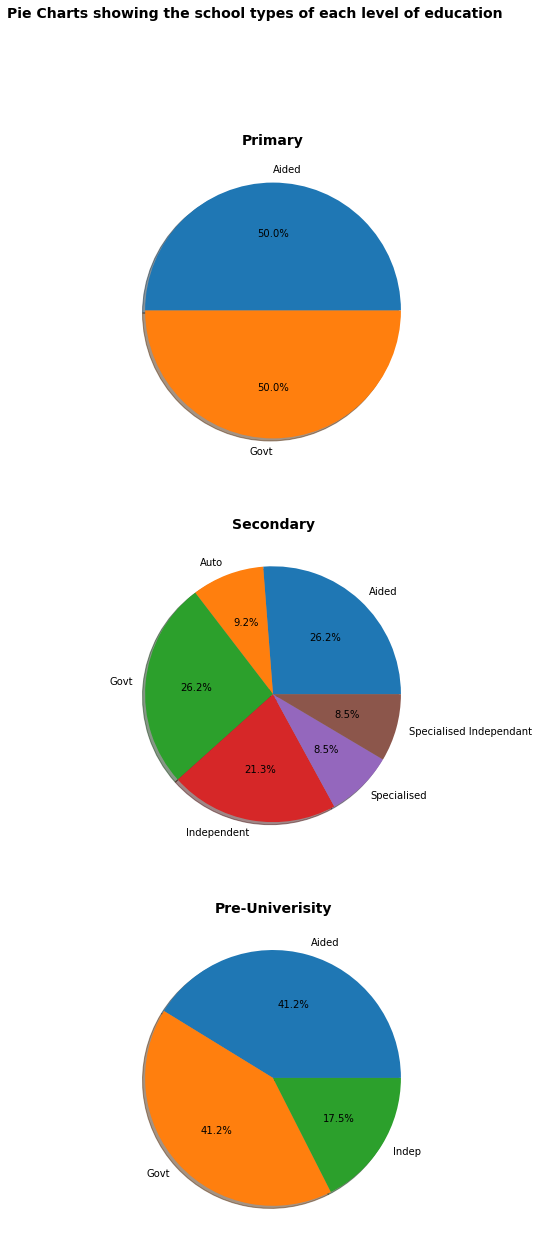

In [6]:
#Pie chart showing school types of each level of education
labels_pri = np.unique(data_pri['school_type'])
labels_sec = np.unique(data_sec['school_type'])
labels_preu = np.unique(data_preu['school_type'])
#print(labels_pri, labels_sec, labels_preu)

#finding how many schools are what type
values_pri = []
for label in labels_pri:
    values_pri.append(len(np.where(data_pri['school_type'] == label)[0]))

values_sec = []
for label in labels_sec:
    values_sec.append(len(np.where(data_sec['school_type'] == label)[0]))

values_preu = []
for label in labels_preu:
    values_preu.append(len(np.where(data_preu['school_type'] == label)[0]))

#plotting pie charts
fig = plt.figure(figsize=(20,20))
fig.suptitle('Pie Charts showing the school types of each level of education', fontsize=14, fontweight='bold')

ax1 = fig.add_subplot(311)
ax1.set_title('Primary', fontsize=14, fontweight='bold')
ax1.pie(values_pri, labels = labels_pri, autopct='%1.1f%%', shadow=True)

ax2 = fig.add_subplot(312)
ax2.set_title('Secondary', fontsize=14, fontweight='bold')
ax2.pie(values_sec, labels = labels_sec, autopct='%1.1f%%', shadow=True)

ax3 = fig.add_subplot(313)
ax3.set_title('Pre-Univerisity', fontsize=14, fontweight='bold')
ax3.pie(values_preu, labels = labels_preu, autopct='%1.1f%%', shadow=True)

plt.show()

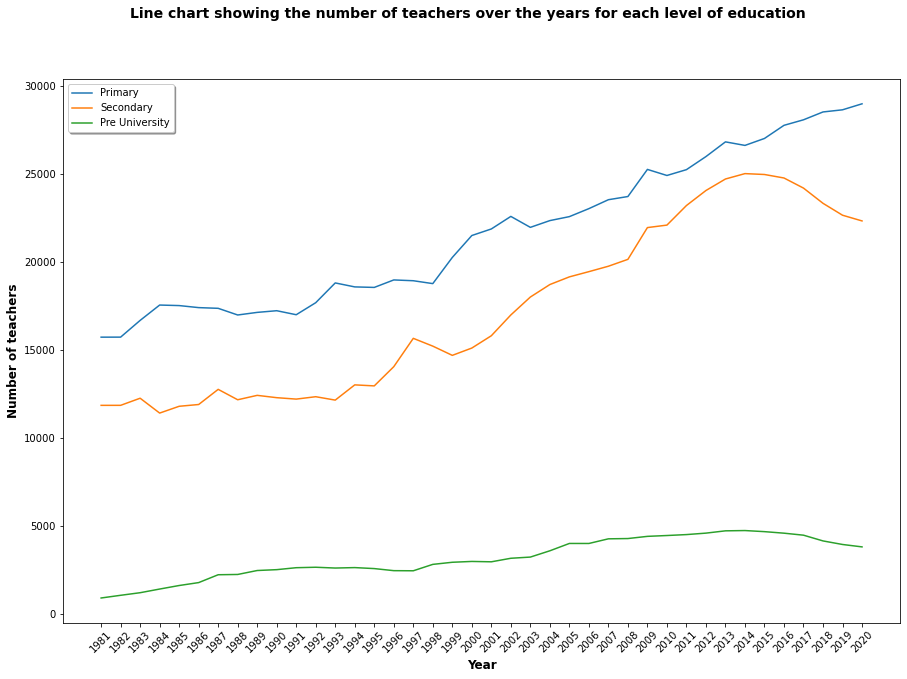

In [37]:
#Line chart showing the number of teachers over the years (1981-2020) for each level of education
#print(np.unique(data_pri['year'])) #1980 to 2020
#print(np.unique(data_sec['year'])) #1981 to 2020
#print(np.unique(data_preu['year'])) #1981 to 2020

def teachersByYear(dataset, array):
    for year in np.unique(dataset['year']):
        yearly_value = 0
        for rows in dataset:
            if rows['year'] == year:
                yearly_value += rows[4]
        array.append(yearly_value)

yearly_teachers_pri = []
yearly_teachers_sec = []
yearly_teachers_preu = []

teachersByYear(data_pri, yearly_teachers_pri)
teachersByYear(data_sec, yearly_teachers_sec)
teachersByYear(data_preu, yearly_teachers_preu)

yearly_teachers_pri.pop(0)

x_labels = np.unique(data_sec['year'])

fig = plt.figure(figsize=(15,10))
fig.suptitle('Line chart showing the number of teachers over the years for each level of education', fontsize=14, fontweight='bold')

ax1 = fig.add_subplot()
ax1.plot(yearly_teachers_pri, label="Primary")
ax1.plot(yearly_teachers_sec, label="Secondary")
ax1.plot(yearly_teachers_preu, label="Pre University")

ax1.set_xticks(np.arange(len(np.unique(data_sec['year']))))
ax1.set_xticklabels(x_labels, rotation=45)

ax1.set_ylabel('Number of teachers', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')

legend = ax1.legend(loc='upper left', shadow=True)

plt.show()

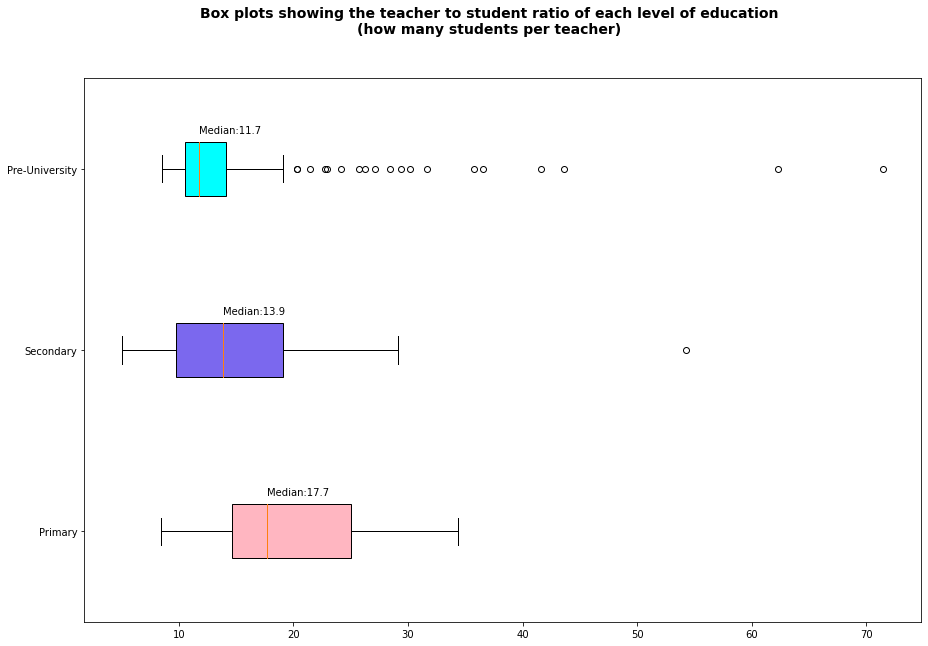

In [8]:
#Box plot showing teacher to student ratio for each level of education

data = [pri_TS_ratio, sec_TS_ratio, preu_TS_ratio]
labels = np.array(['Primary', 'Secondary', 'Pre-University'])

fig = plt.figure(figsize=(15,10))
fig.suptitle('Box plots showing the teacher to student ratio of each level of education\n(how many students per teacher)', fontsize=14, fontweight='bold')

ax1 = fig.add_subplot()
bxplt = ax1.boxplot(data, labels=labels, vert=False, patch_artist=True)
bxplt['boxes'][0].set_facecolor('lightpink')
bxplt['boxes'][1].set_facecolor('mediumslateblue')
bxplt['boxes'][2].set_facecolor('cyan')

for line in bxplt['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x, y+0.05, f'Median:{x:.1f}')
    
plt.show()

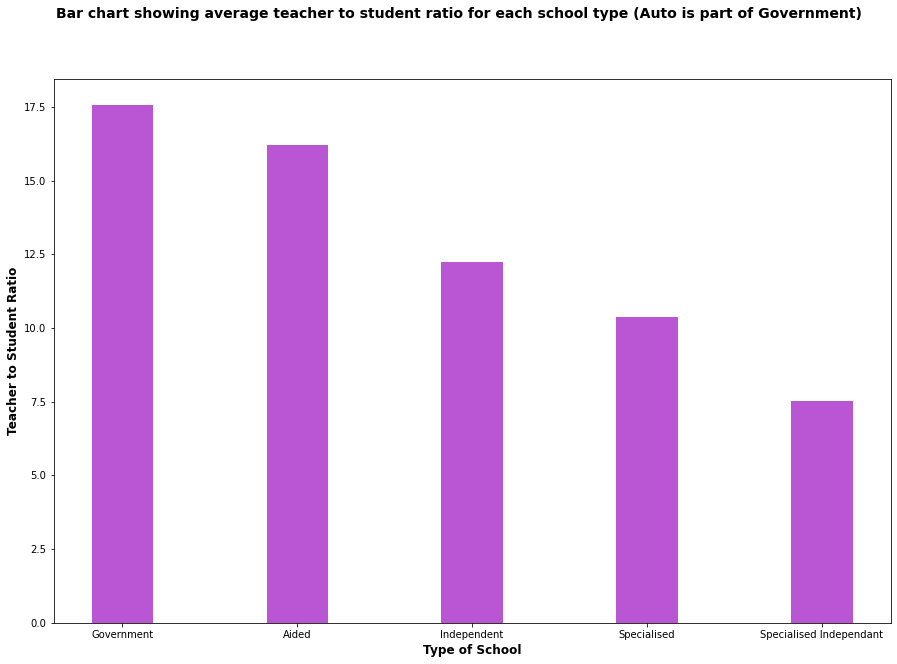

In [9]:
#Bar chart showing the average teacher to student ratio in each type of school from all levels of education
labels_pri = np.unique(data_pri['school_type'])
labels_sec = np.unique(data_sec['school_type'])
labels_preu = np.unique(data_preu['school_type'])
#print(labels_pri, labels_sec, labels_preu)

aided_tsr = 0
aided_num = 0
govt_tsr = 0
govt_num = 0
indep_tsr = 0
indep_num = 0
spec_tsr = 0
spec_num = 0
specind_tsr = 0
specind_num = 0

for data in [data_pri, data_sec, data_preu]:
    for rows in data:
        if rows[2] == 'Aided':
            aided_tsr += rows[3]/rows[4]
            aided_num += 1
        elif rows[2] == 'Govt' or rows[2] == 'Auto':
            govt_tsr += rows[3]/rows[4]
            govt_num += 1
        elif rows[2] == 'Independent' or rows[2] == 'Indep':
            indep_tsr += rows[3]/rows[4]
            indep_num += 1
        elif rows[2] == 'Specialised':
            spec_tsr += rows[3]/rows[4]
            spec_num += 1
        elif rows[2] == 'Specialised Independant':
            specind_tsr += rows[3]/rows[4]
            specind_num += 1

avg_aided = aided_tsr/aided_num
avg_govt = govt_tsr/govt_num
avg_indep = indep_tsr/indep_num
avg_spec = spec_tsr/spec_num
avg_specind = specind_tsr/specind_num

x_labels = ['Government', 'Aided', 'Independent', 'Specialised', 'Specialised Independant']
types = np.arange(5)
num = (avg_govt, avg_aided, avg_indep, avg_spec, avg_specind)
width = 0.35

fig = plt.figure(figsize=(15,10))
fig.suptitle('Bar chart showing average teacher to student ratio for each school type (Auto is part of Government)', fontsize=14, fontweight='bold')

ax1 = fig.add_subplot()
ax1.bar(types, num, width, color = 'mediumorchid')

ax1.set_ylabel('Teacher to Student Ratio', fontsize=12, fontweight='bold')
ax1.set_xlabel('Type of School', fontsize=12, fontweight='bold')
ax1.set_xticks(types, x_labels)

plt.show()

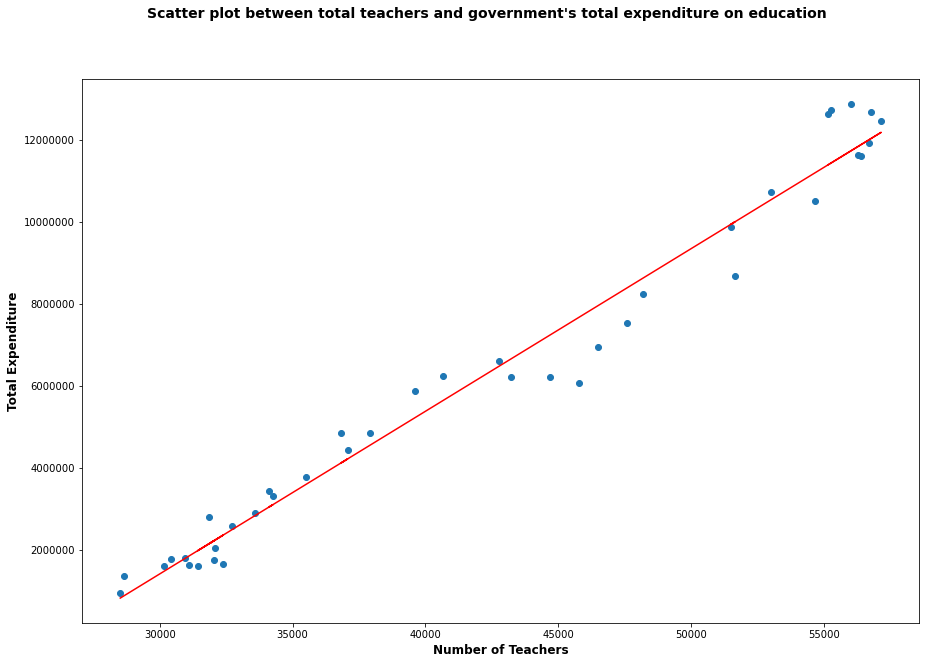

In [49]:
#Scatter plot between government total expenditure on education and total teachers
#combining yearly_teacher_(level of education)
yearly_teachers_pri = np.array(yearly_teachers_pri)
yearly_teachers_sec = np.array(yearly_teachers_sec)
yearly_teachers_preu = np.array(yearly_teachers_preu)

yearly_teachers = yearly_teachers_pri + yearly_teachers_sec + yearly_teachers_preu
#print(yearly_teachers)

#print(data_expenditure['total_expenditure_on_education'])

x = yearly_teachers
y = data_expenditure['total_expenditure_on_education']

fig = plt.figure(figsize=(15,10))
fig.suptitle('Scatter plot between total teachers and government\'s total expenditure on education', fontsize=14, fontweight='bold')

ax1 = fig.add_subplot()
ax1.scatter(x, y)

ax1.set_ylabel('Total Expenditure', fontsize=12, fontweight='bold')
ax1.set_xlabel('Number of Teachers', fontsize=12, fontweight='bold')

m,c = np.polyfit(x, y, deg=1)
ax1.plot(x, m*x + c, 'r-')

ax1.ticklabel_format(style = 'plain')

plt.show()